## Exploratory Data Analysis

In [37]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

#### Understand ditribution of training / test data

In [38]:
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

train_labels = train_data[:, -1]
test_labels = test_data[:, -1]

text_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
unique_elements, counts = np.unique(train_labels, return_counts=True)

print("Unique elements:", unique_elements)
print("Counts:", counts)

Unique elements: [0 1 2 3 4]
Counts: [2033 1947 2001 2005 2014]


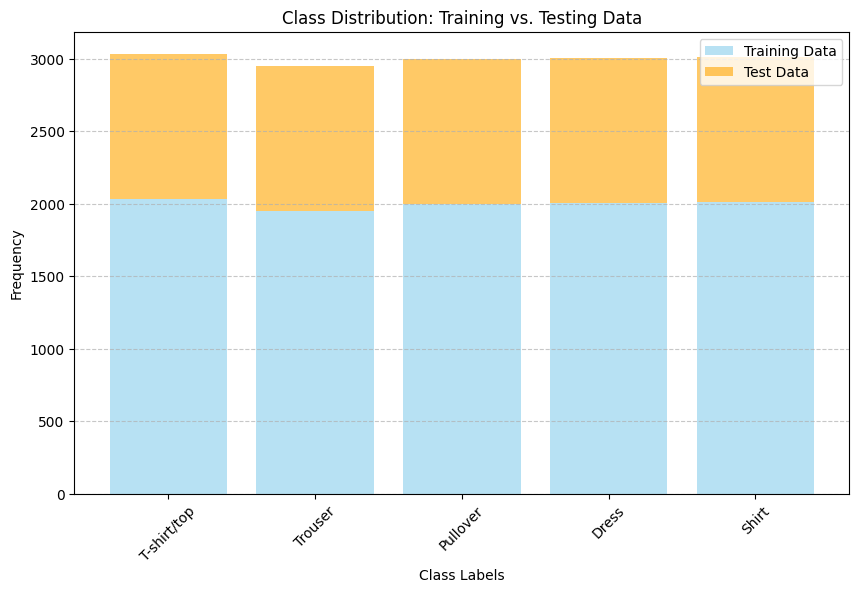

In [39]:
train_unique_elements, train_counts = np.unique(train_labels, return_counts=True)
test_unique_elements, test_counts = np.unique(test_labels, return_counts=True)
text_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
plt.figure(figsize=(10, 6))

# Plot training data
plt.bar(text_label, train_counts, color='skyblue', alpha=0.6, label='Training Data')

# Plot test data
plt.bar(text_label, test_counts, color='orange', alpha=0.6, label='Test Data', bottom=train_counts)

plt.title('Class Distribution: Training vs. Testing Data')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
print("Number of missing values:", np.sum(np.isnan(train_data)))  # Check for NaNs
type(train_data)

Number of missing values: 0


numpy.ndarray

#### Understand range of values for each feature

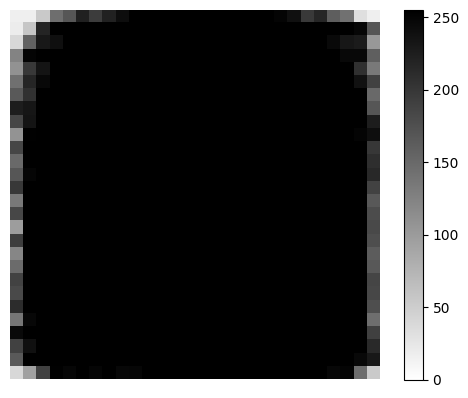

In [41]:
valrange = []
valavg = []
for i in range(28):
    row = []
    row2 = []
    for j in range(28):
        v = (i*28) + j
        range_value = np.ptp(train_data[:, v])
        avg_value = np.mean(train_data[:,v])
        row.append(range_value)
        row2.append(avg_value)
    valrange.append(row)
    valavg.append(row2)
    
plt.imshow(valrange, cmap='gray_r', vmin=0, vmax=255)
plt.colorbar()  # Optional: Add a color bar to show the scale
plt.axis('off')  # Optional: Hide the axis
plt.show()

### **Data visualisation**
#### Getting visualisation of random sample images

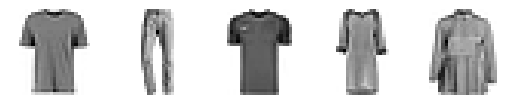

In [42]:
images = []
for i in train_data:
    i = i[:-1]
    d2 = i.reshape((28,28))
    images.append(d2)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')

#### Visualisation of average sample images

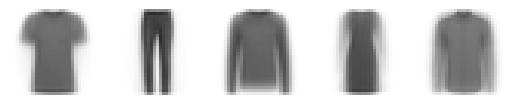

In [43]:
clothes = []
for m in range(5):
    cloth = train_data[train_data[:, -1] == m]
    cavg = []
    for i in range(28):
        row = []
        for j in range(28):
            v = (i*28) + j
            avg_value = np.mean(cloth[:,v])
            row.append(avg_value)
        cavg.append(row)
    clothes.append(cavg)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(clothes[i], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')

### **PCA Dimensionality Reduction**

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#### Scale Data

In [45]:
scaler = MinMaxScaler() # Option 1
# scaler = RobustScaler() # Option 2
X_scaled = scaler.fit_transform(train_data[:,:-1])

#### Get variance explained

In [46]:
# Perform PCA on the scaled data
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio for the first two PCs
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1, PC2): {explained_variance_ratio}")

Explained Variance Ratio (PC1, PC2): [0.40317348 0.17384003]


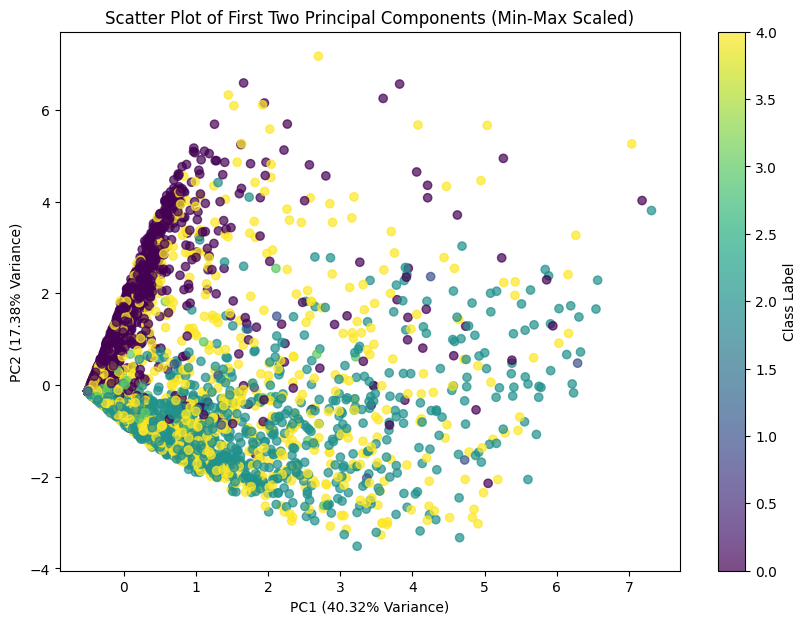

In [47]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_labels, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} Variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} Variance)')
plt.title('Scatter Plot of First Two Principal Components (Min-Max Scaled)')
plt.colorbar(label='Class Label')
plt.show()

#### Cumulative variance visualisation

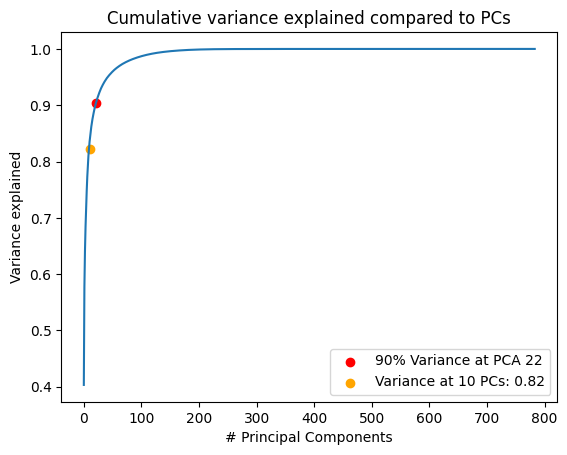

In [48]:
pca = PCA()
pca.fit_transform(X_scaled) #PCA and components
principal_components = pca.components_

loadings = pca.explained_variance_ratio_ #variance
variance_explained = np.cumsum(loadings) #cumulative variance

plt.plot(range(len(loadings)), variance_explained)
plt.title("Cumulative variance explained compared to PCs")
plt.xlabel("# Principal Components")
plt.ylabel("Variance explained")

index_60 = np.argmin(variance_explained < 0.9)
plt.scatter(index_60 + 1, variance_explained[index_60], color='red', label=f'90% Variance at PCA {index_60 + 1}')

plt.scatter(10, variance_explained[9], color='orange', label=f'Variance at 10 PCs: {variance_explained[9]:.2f}')

plt.legend()
plt.show()


### **Recontruction of Data Sample using fewer features (PCA)**

In [49]:
#Reconstruction of an image using PC
mean = np.mean(train_data[:,:-1], dtype=np.float64, axis=0)

sample = train_data[10, :-1].astype(np.float64)

centered_sample = sample - mean

sum_of_pcxs = np.zeros_like(sample, dtype=np.float64)

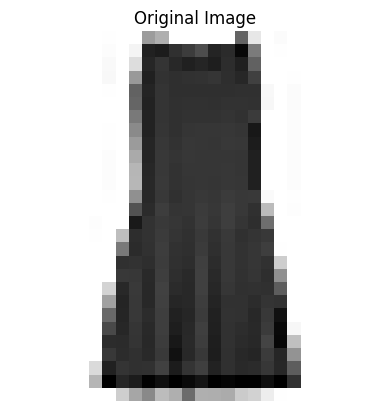

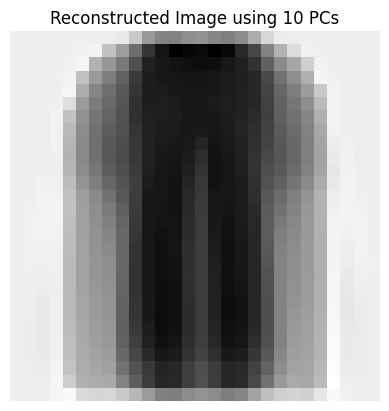

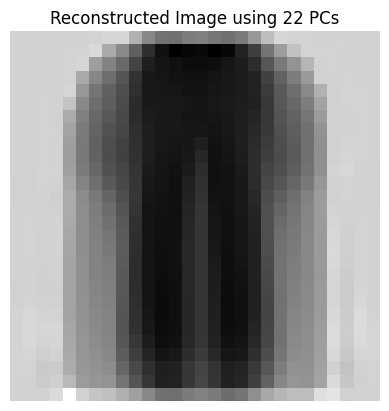

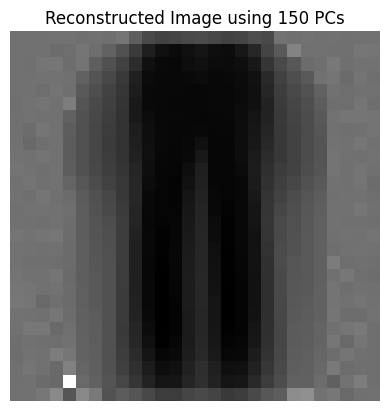

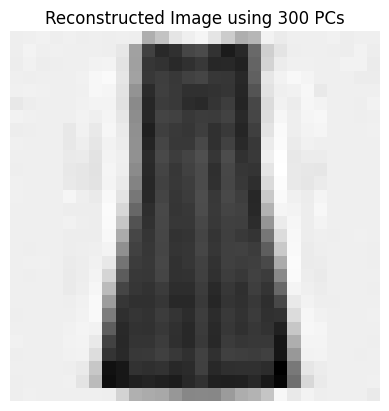

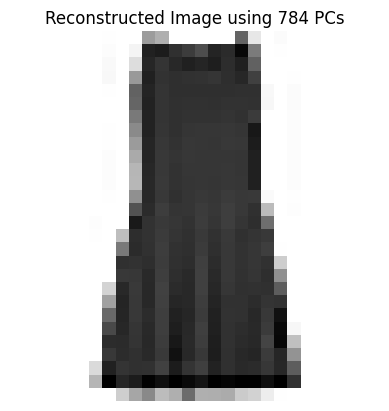

In [50]:
#Same for different M
sums_of_pcxs = np.zeros(10)
Ms = np.array([10, 22, 150,300, 784])

def PCXSUM(components, m, centered_sample):
    """
    Function to calculate the sum of projections using the first m components.
    """
    sum_of_pcxs = np.zeros_like(centered_sample, dtype=np.float64)
    for i in range(m):  # Loop over the first m principal components
        # Projection onto the i-th principal component
        projection = np.dot(centered_sample, components[i]) * components[i]
        sum_of_pcxs += projection
    return sum_of_pcxs

plt.imshow(images[10], cmap= 'binary')
plt.title("Original Image")
plt.axis("off")
plt.show()

# Loop over the different values of M and plot the reconstructions
for M in Ms:
    # Compute the sum of projections for the first M principal components
    sum_of_pcxs = PCXSUM(pca.components_, M, centered_sample)
    
    # Add the mean to reconstruct the image
    reconstruction = mean + sum_of_pcxs
    
    # Reshape and display the reconstructed image
    plt.imshow(reconstruction.reshape((28, 28)), cmap='binary')
    plt.title(f'Reconstructed Image using {M} PCs')
    plt.axis("off")
    plt.show()